In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns.set_theme(style='darkgrid', font="serif")

In [3]:
#Fig.1
data = {'Relevance 2' : ([16.3, 17.1, 19.9, 23.0], [83, 80.6, 73.1, 64.6] ), 
        'Relevance 2 & 3' : ([34.6, 35.5, 38.0, 41.3], [64.1, 60.6, 50.7, 42.1])
       }

def interpolate(x,y):
    # Given data
    x = [0, 8] + x 
    y = [100, 97] + y 

    # Interpolate
    coefficients = np.polyfit(x, y, 3)  # 3 for a third-degree polynomial
    polynomial = np.poly1d(coefficients)

    # Plot
    xs = np.linspace(0, max(x)+3, 10)  # Generate many x values for a smooth curve
    ys = polynomial(xs)
    
    return xs, ys
    

Text(10, 30, 'Dashed curves\nbased on extrapolation')

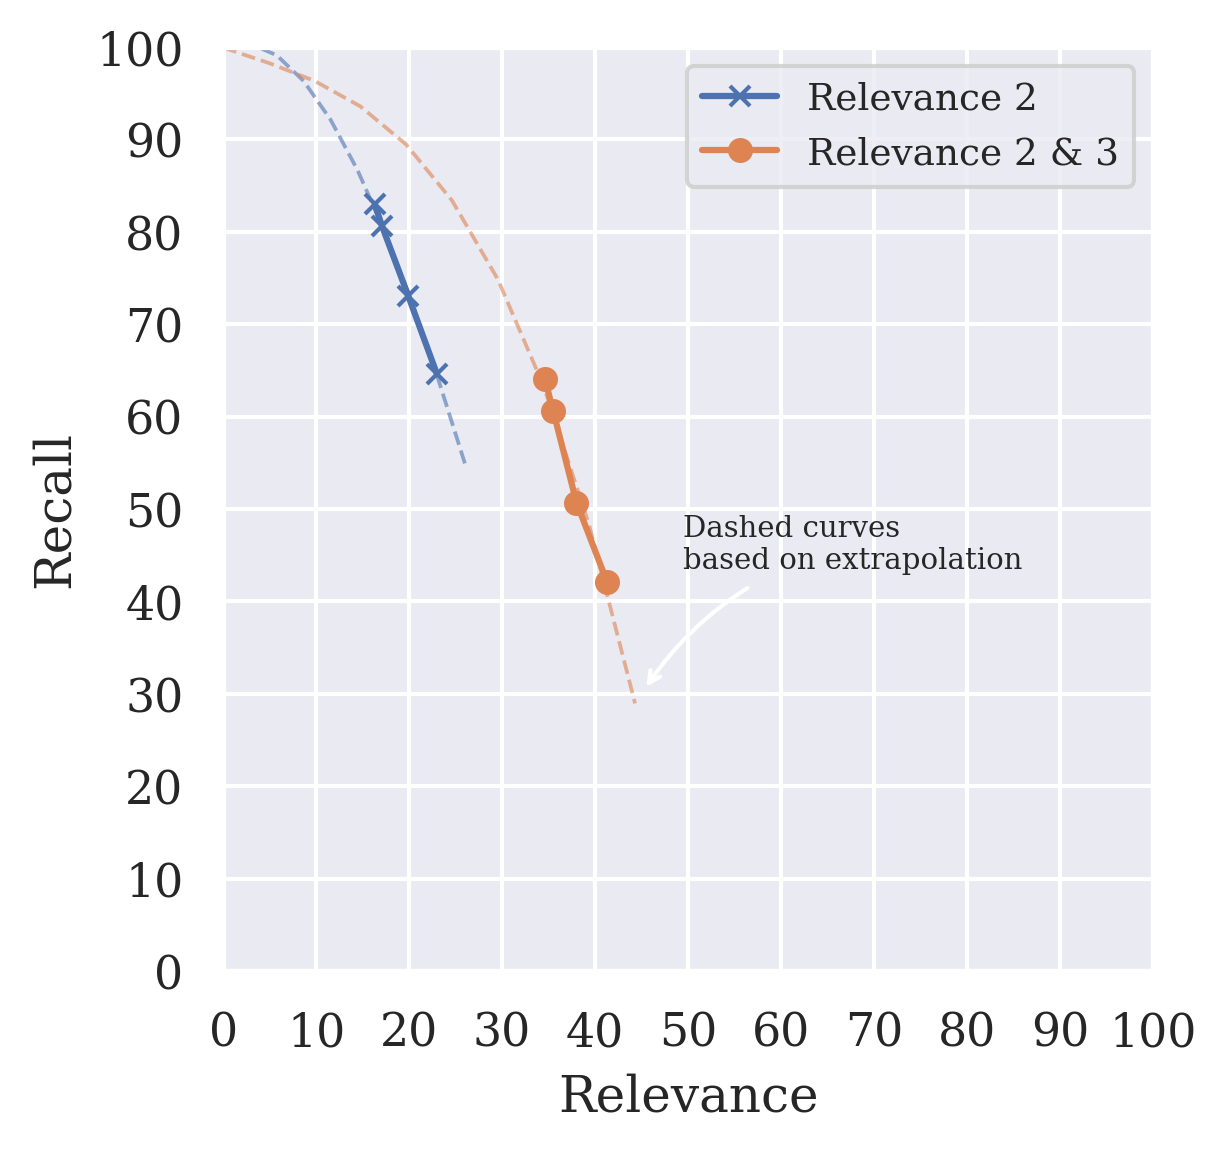

In [4]:
f, ax = plt.subplots(dpi=300, figsize=(4,4))

colors = sns.color_palette()
markers = ['x-', 'o-']

for i, (title, (rel, rec)) in enumerate(data.items()):
    ax.plot(rel,rec, markers[i], color=colors[i], label=title, markersize=5)
    xs, ys = interpolate(rel, rec)
    ax.plot(xs,ys, '--',  color=colors[i], lw=0.9, alpha=0.6)

ax.set_ylim(0,100)
ax.set_xlim(0,100)
ax.set_xticks(range(0,110,10))
ax.set_yticks(range(0,110,10))
ax.set_ylabel('Recall')
ax.set_xlabel('Relevance')

ax.legend(fontsize=9)

# Annotation
ax.annotate('Dashed curves\nbased on extrapolation', xy=(45, 30), xycoords='data', 
            xytext=(10, 30), textcoords='offset points', fontsize=7,
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="arc3,rad=.2"))

Text(0.05, 0.25, 'HM=$\\frac{2}{\\frac{1}{POD} + \\frac{1}{SR} }$')

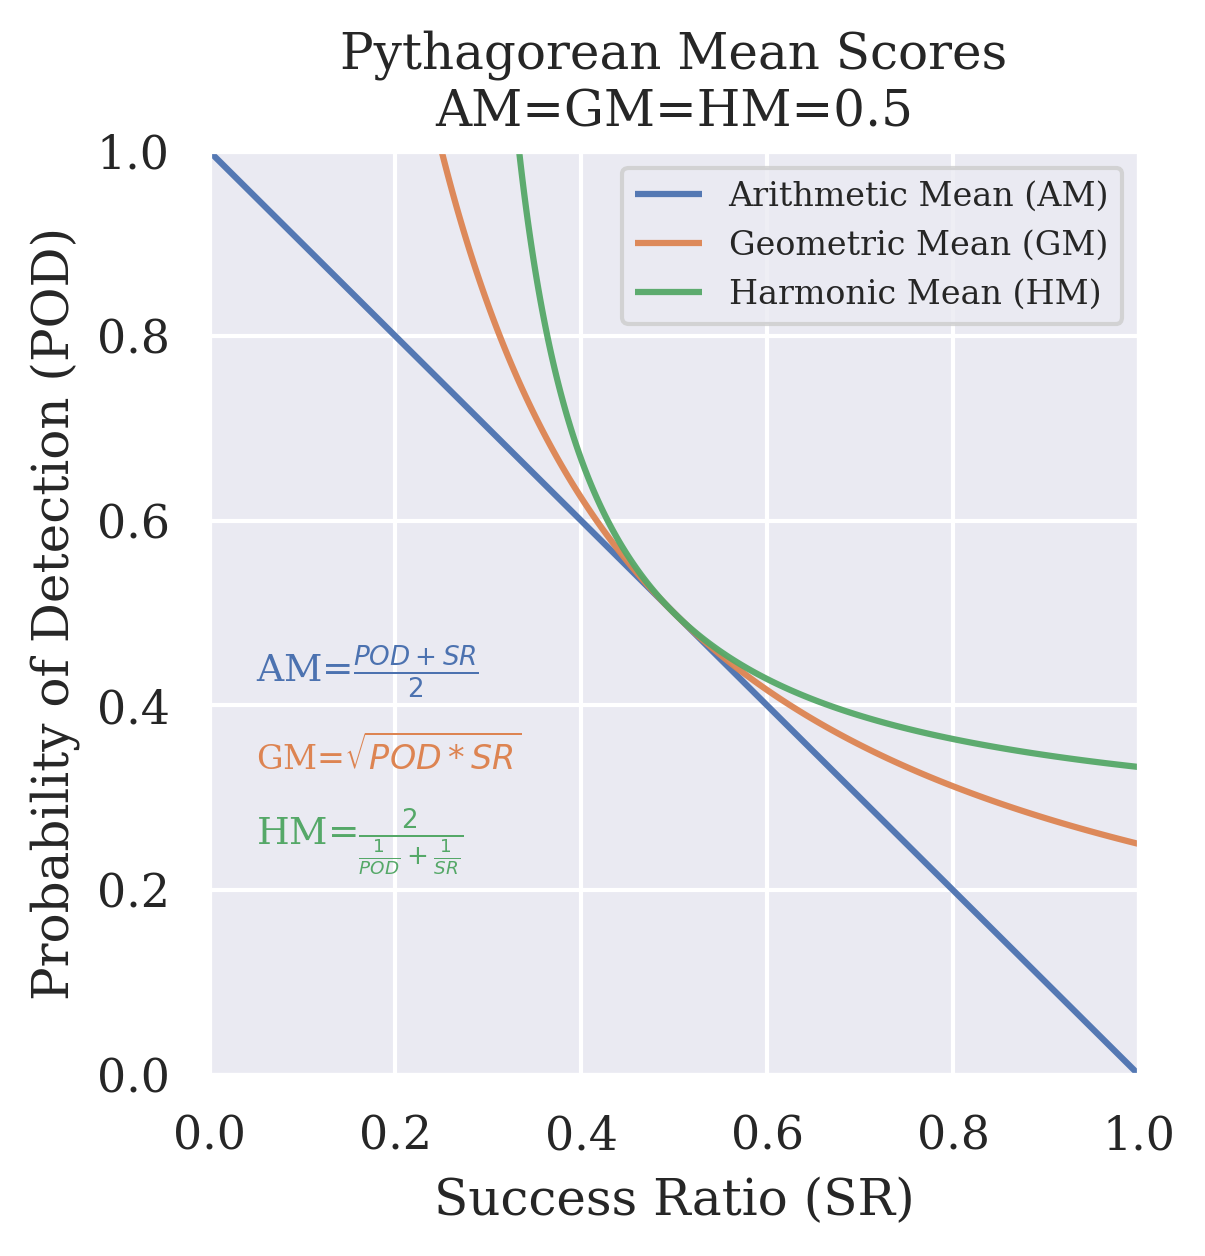

In [5]:
x = np.linspace(0.0000001,1,1000)
y = np.linspace(0.00001,1, 1000)

xx, yy = np.meshgrid(x, y)

am = (xx+yy)/2
gm = np.sqrt(xx*yy)
hm = 2 / ((1/xx) + (1/yy))

f,ax = plt.subplots(dpi=300, figsize=(4,4))

data = {'Arithmetic Mean (AM)' :  am, 
        'Geometric Mean (GM)' : gm, 
        'Harmonic Mean (HM)': hm
       }

colors = sns.color_palette()
contour_sets = {}  # Keep track of contour sets for the legend
for i, (title, z) in enumerate(data.items()):
    cs = ax.contour(xx, yy, z, levels=[0.5], colors=[colors[i]], alpha=0.95)
    #ax.clabel(cs, inline=True, fontsize=8)
    contour_sets[title] = cs.collections[0]

    
# Adjust the legend to use contour sets
handles, labels = contour_sets.values(), contour_sets.keys()
ax.legend(handles, labels, loc='upper right', fontsize=8)
    
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_title('Pythagorean Mean Scores\nAM=GM=HM=0.5')
ax.set_ylabel('Probability of Detection (POD)')
ax.set_xlabel('Success Ratio (SR)')

"""
# Annotation
ax.annotate('AM=HM=GM\nwhen POD=SR', xy=(0.5, 0.5), xycoords='data', 
            xytext=(10, 30), textcoords='offset points', fontsize=9,
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="arc3,rad=.2"))

# Annotation with text and the first arrow
ax.annotate(r'Otherwise, HM$\geq$GM$\geq$AM', 
            xy=(0.8, 0.2), xycoords='data', 
            xytext=(-120, -20), textcoords='offset points', fontsize=9,
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="arc3,rad=.2"))

# Annotations with just the arrows
points = [(0.8, 0.3), (0.8, 0.35)]
for point in points:
    ax.annotate('', 
                xy=point, xycoords='data', 
                xytext=(-30, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->", 
                                connectionstyle="arc3,rad=.2"))
"""
    
ax.annotate(r'AM=$\frac{POD+SR}{2}$', xy=(0.05, 0.425), fontsize=9, ha='left', color=colors[0])    
ax.annotate(r'GM=$\sqrt{POD*SR}$', xy=(0.05, 0.33), fontsize=8, ha='left', color=colors[1])  
ax.annotate(r'HM=$\frac{2}{\frac{1}{POD} + \frac{1}{SR} }$', xy=(0.05, 0.25), 
            fontsize=9, ha='left', color=colors[2])  

Text(0.05, 0.1, '$T_{\\gamma} = \\frac{a \\gamma^{-1}}{a\\gamma^{-1}+b+c(1-\\gamma)\\gamma^{-1}}$')

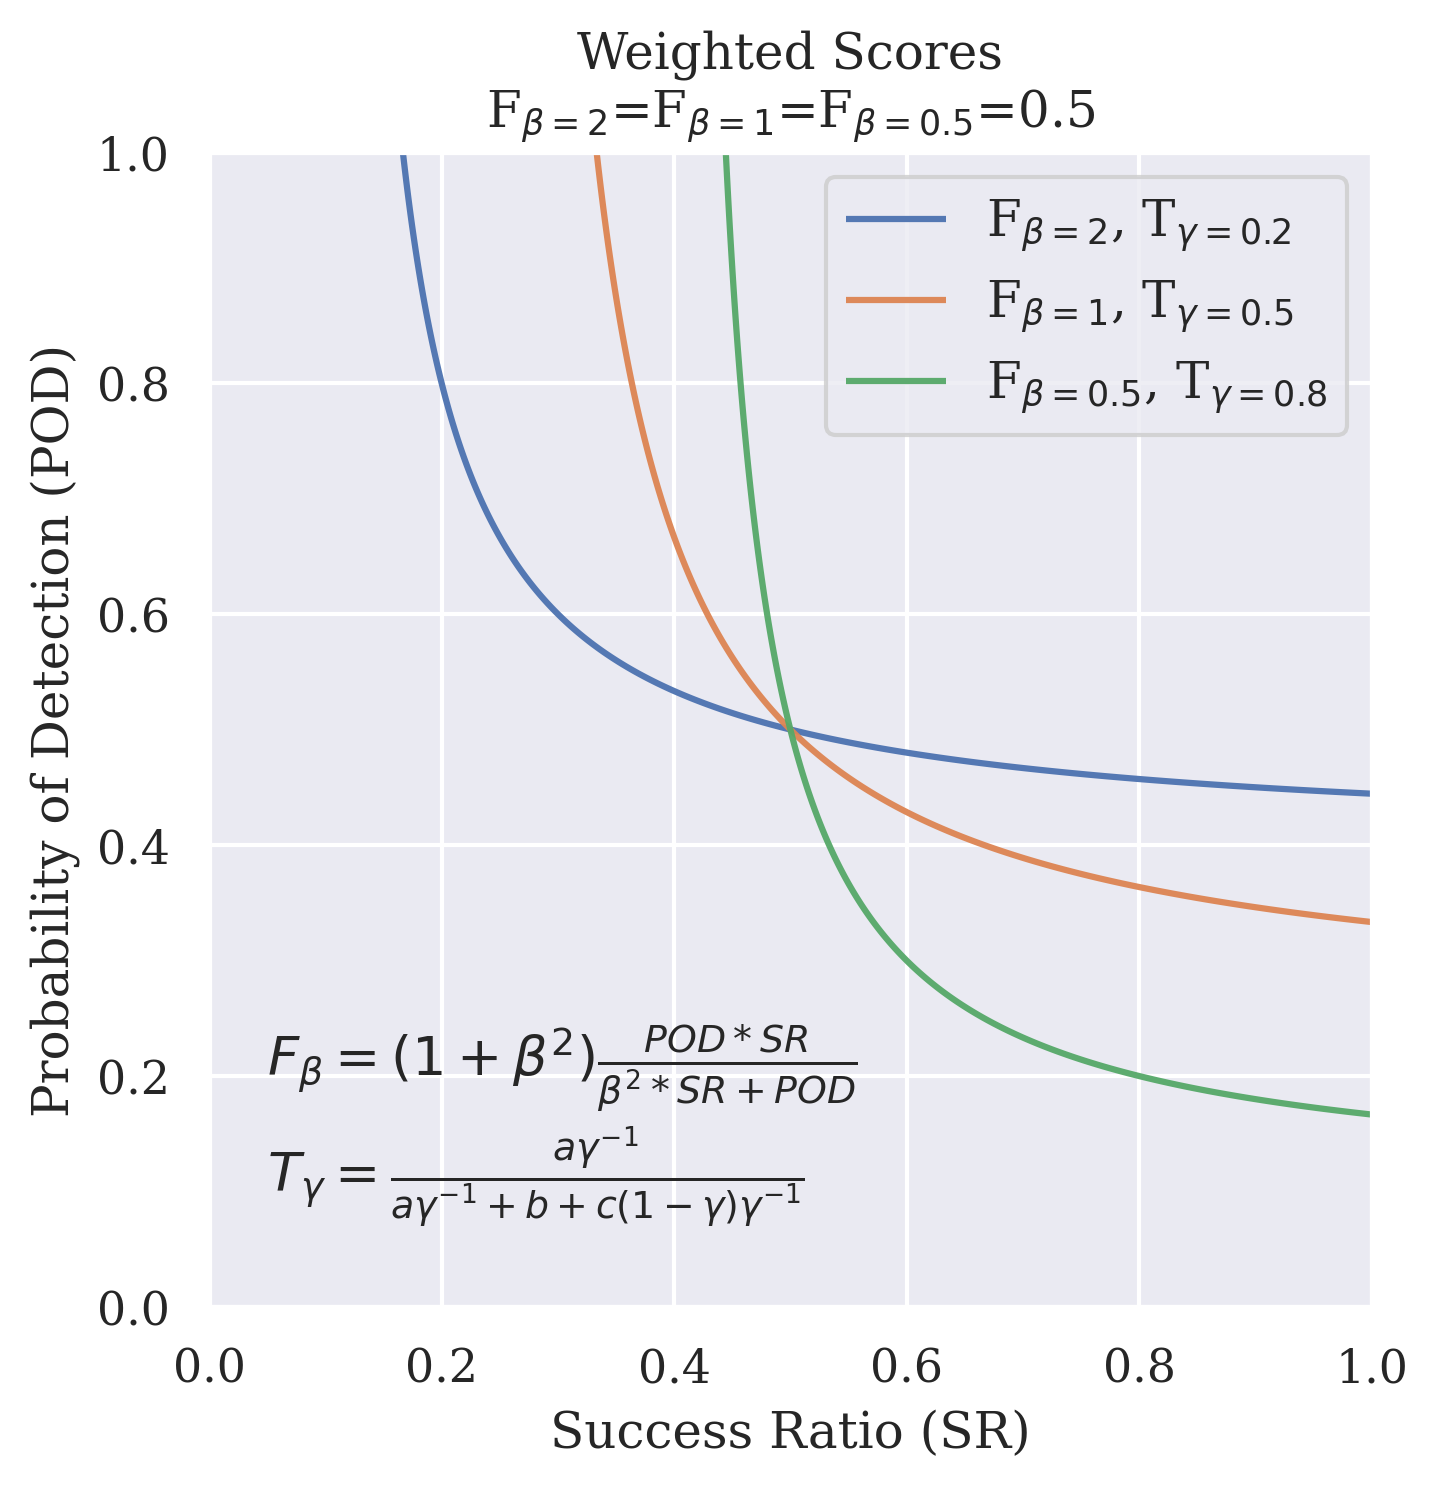

In [6]:
f, ax = plt.subplots(dpi=300, figsize=(5,5))

x = np.linspace(0.0001, 1, 1000)
y=x

def f_beta(sr, pod, beta):
    term1 = (1+beta**2)
    
    num = pod*sr
    denom = (sr*beta**2) + pod
    
    return term1 * (num/denom)

xx, yy = np.meshgrid(x, y)

data = {r'F$_{\beta=2}$, T$_{\gamma=0.2}$' : f_beta(xx,yy, beta=2), 
        r'F$_{\beta=1}$, T$_{\gamma=0.5}$' : f_beta(xx,yy, beta=1),
        r'F$_{\beta=0.5}$, T$_{\gamma=0.8}$' : f_beta(xx,yy, beta=0.5) 
       }

colors = sns.color_palette()
contour_sets = {}  # Keep track of contour sets for the legend
for i, (title, z) in enumerate(data.items()):
    cs = ax.contour(xx, yy, z, levels=[0.5], colors=[colors[i]], alpha=0.95)
    #ax.clabel(cs, inline=True, fontsize=8)
    contour_sets[title] = cs.collections[0]

    
# Adjust the legend to use contour sets
handles, labels = contour_sets.values(), contour_sets.keys()
ax.legend(handles, labels, loc='upper right', fontsize=12)
    
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_title('Weighted Scores\n'+r'F$_{\beta=2}$=F$_{\beta=1}$=F$_{\beta=0.5}$=0.5')
ax.set_ylabel('Probability of Detection (POD)')
ax.set_xlabel('Success Ratio (SR)')

ax.annotate(r'$F_{\beta} = (1+\beta^2)\frac{POD*SR}{\beta^2*SR + POD}$', xy=(0.05, 0.2), fontsize=13, ha='left') 
ax.annotate(r'$T_{\gamma} = \frac{a \gamma^{-1}}{a\gamma^{-1}+b+c(1-\gamma)\gamma^{-1}}$', 
            xy=(0.05, 0.1), fontsize=13, ha='left') 


In [7]:
##Fig. 4
data = {
    'Year': [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
             2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
             2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'AM': [0.224245, 0.198418, 0.205972, 0.234995, 0.324408, 0.285665, 0.344009, 0.307996, 0.328946,
           0.391957, 0.369073, 0.369332, 0.390174, 0.456638, 0.397754, 0.453198, 0.461085, 0.484054,
           0.471857, 0.440238, 0.434083, 0.461936, 0.463734, 0.423968, 0.446095, 0.487957, 0.450253,
           0.407409, 0.372898, 0.418414, 0.403724, 0.396223, 0.405769, 0.427663, 0.403807, 0.443052,
           0.413884],
    'GM': [0.220974, 0.19811, 0.205148, 0.232183, 0.321912, 0.28207, 0.341851, 0.305661, 0.320871,
           0.366217, 0.341879, 0.340521, 0.339812, 0.421204, 0.364153, 0.4234, 0.410113, 0.424833,
           0.420798, 0.377989, 0.368832, 0.407139, 0.414102, 0.378935, 0.39896, 0.438893, 0.415109,
           0.389271, 0.360177, 0.404715, 0.390521, 0.380941, 0.393295, 0.410674, 0.390312, 0.425483,
           0.397783],
    'HM': [0.21775, 0.197802, 0.204327, 0.229405, 0.319434, 0.278519, 0.339707, 0.303344, 0.312994,
           0.342167, 0.316689, 0.313958, 0.29595, 0.38852, 0.33339, 0.395562, 0.364776, 0.372857,
           0.375264, 0.324542, 0.313389, 0.358842, 0.369782, 0.338686, 0.356805, 0.394763, 0.382708,
           0.37194, 0.34789, 0.391464, 0.37775, 0.366248, 0.381203, 0.394361, 0.377267, 0.408611,
           0.382309],
    r'F$_{\beta=0.5}$': [0.197574, 0.191406, 0.193926, 0.209973, 0.297345, 0.25438, 0.318347, 0.282513, 0.276465,
             0.281886, 0.258302, 0.254769, 0.228559, 0.315425, 0.268568, 0.325842, 0.286274, 0.28958,
             0.295143, 0.2482, 0.238069, 0.279592, 0.291151, 0.266871, 0.281295, 0.312754, 0.310541,
             0.315997, 0.301105, 0.339732, 0.327855, 0.314367, 0.332166, 0.337802, 0.326973, 0.350052,
             0.327959],
    r'F$_{\beta=2.0}$': [0.242515, 0.204641, 0.215906, 0.2528, 0.34507, 0.307721, 0.36414, 0.327492, 0.360645,
             0.435242, 0.409182, 0.408973, 0.419699, 0.505712, 0.439458, 0.50324, 0.502596, 0.523363,
             0.515096, 0.468711, 0.458425, 0.500791, 0.506597, 0.463382, 0.487728, 0.535063, 0.498572,
             0.451952, 0.411889, 0.461781, 0.445558, 0.438636, 0.447228, 0.473668, 0.445847, 0.490698,
             0.458252]
}

df= pd.DataFrame(data)

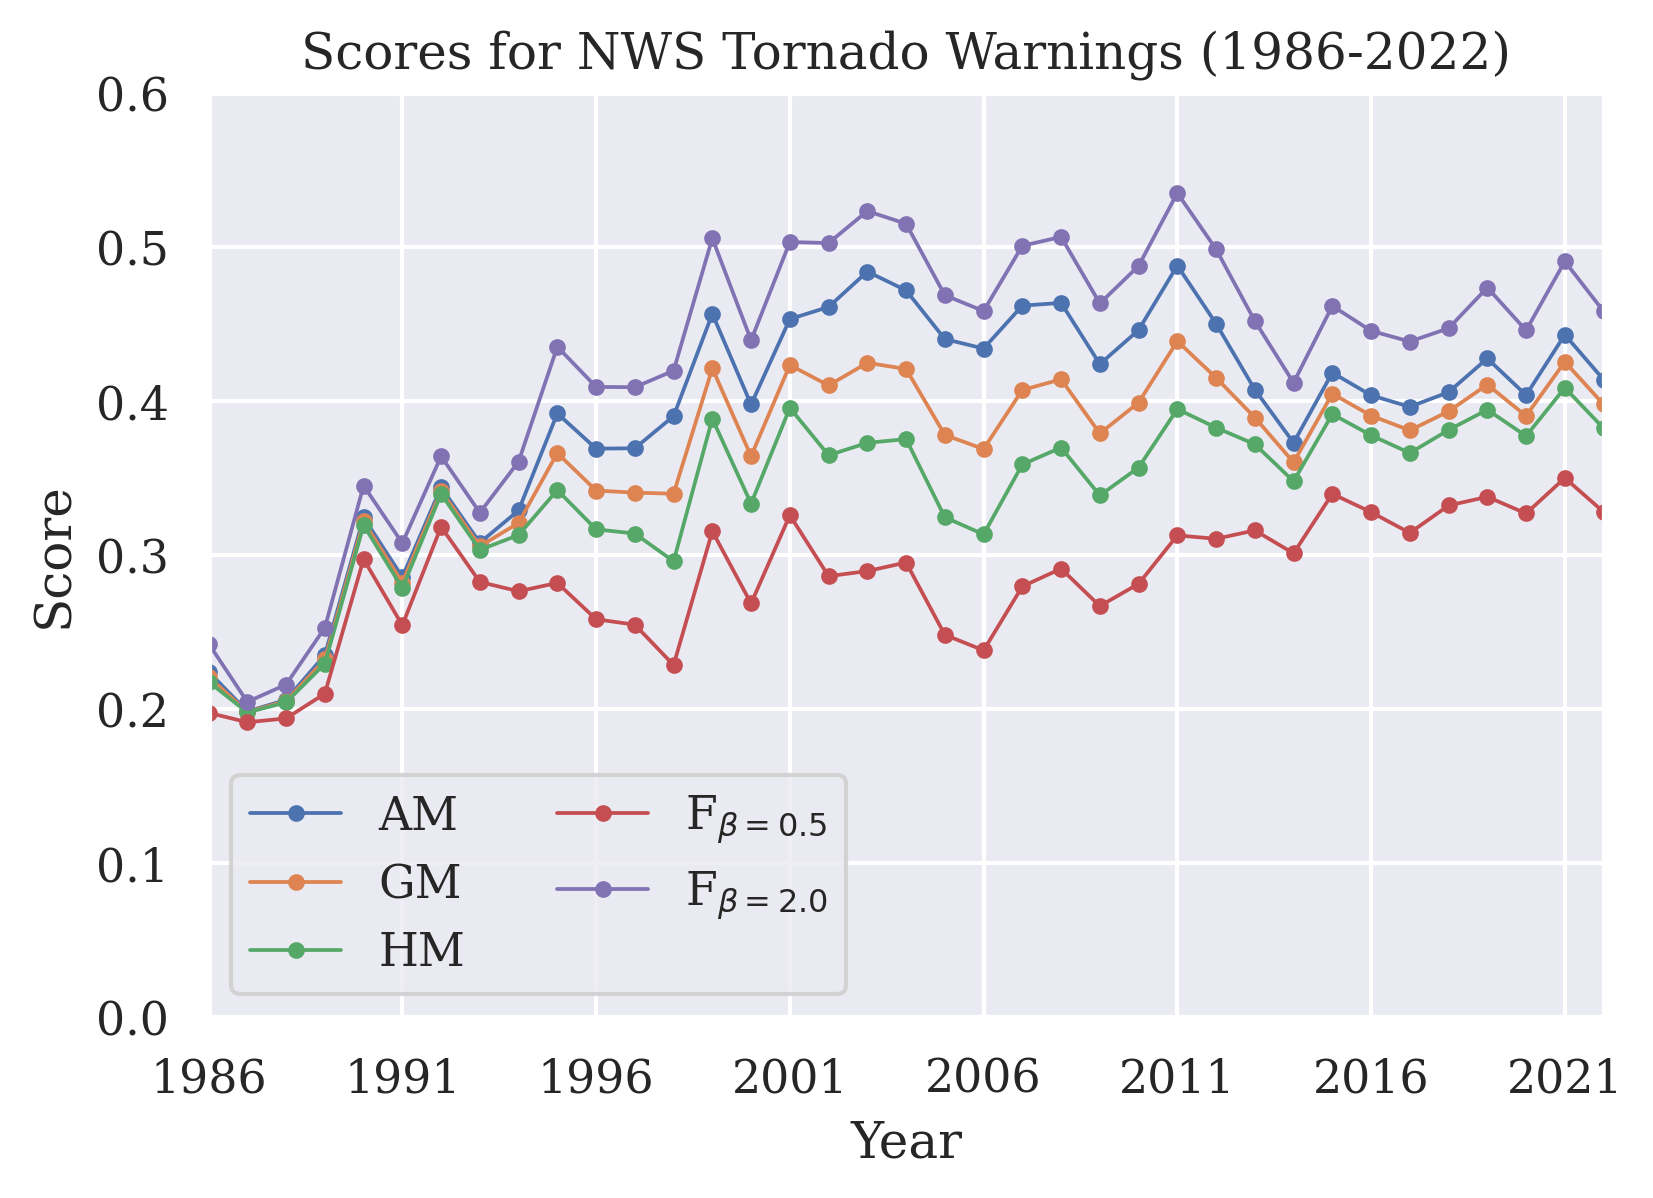

In [8]:
f, ax = plt.subplots(dpi=300, figsize=(6,4))

scores = list(df.columns)
scores.remove('Year')


for s in scores:
    ax.plot(df['Year'].values, df[s], 'o-', lw=0.9, label=s, markersize=3)
    
ax.set_ylim(0, 0.6)
ax.set_xticks([1986, 1991, 1996, 2001, 2006, 2011, 2016, 2021])
ax.set_xlim(1986, 2022)

ax.set_ylabel('Score')
ax.set_xlabel('Year')
ax.set_title('Scores for NWS Tornado Warnings (1986-2022)')
ax.legend(ncol=2)